In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/moods_2024.csv')

In [3]:
df.columns

Index(['full_date', 'weekday', 'time', 'mood', 'activities', 'month',
       'mood_numeric', 'activities_count', 'sleep_level', 'emotions_encoded',
       'health_encoded', 'productivity_encoded', 'places_encoded',
       'tasks_encoded', 'school_encoded', 'positive_emotions',
       'neutral_emotions', 'negative_emotions'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   full_date             300 non-null    object 
 1   weekday               300 non-null    int64  
 2   time                  300 non-null    float64
 3   mood                  300 non-null    object 
 4   activities            300 non-null    object 
 5   month                 300 non-null    int64  
 6   mood_numeric          300 non-null    int64  
 7   activities_count      300 non-null    int64  
 8   sleep_level           300 non-null    float64
 9   emotions_encoded      300 non-null    float64
 10  health_encoded        198 non-null    float64
 11  productivity_encoded  190 non-null    float64
 12  places_encoded        63 non-null     float64
 13  tasks_encoded         116 non-null    float64
 14  school_encoded        124 non-null    float64
 15  positive_emotions     3

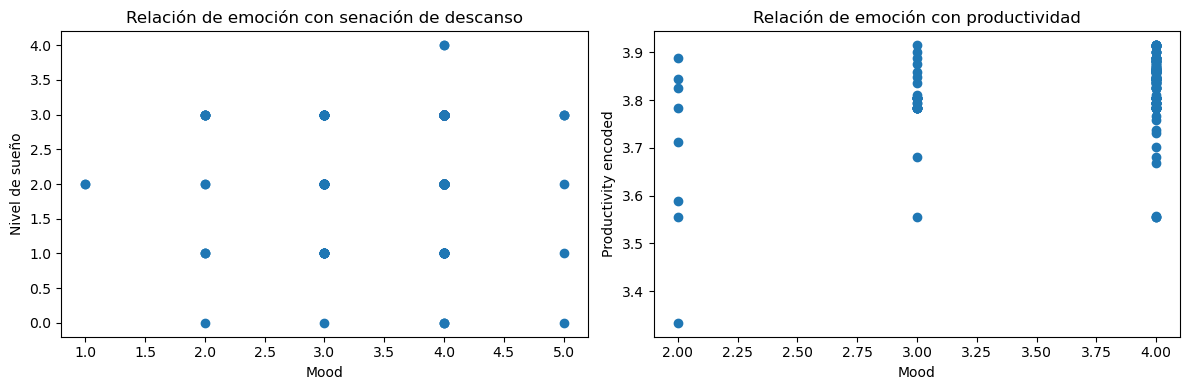

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(df['mood_numeric'], df['sleep_level'])
axes[0].set_title("Relación de emoción con senación de descanso")
axes[0].set_xlabel('Mood')
axes[0].set_ylabel('Nivel de sueño')

axes[1].scatter(df['mood_numeric'], df['productivity_encoded'])
axes[1].set_title("Relación de emoción con productividad")
axes[1].set_xlabel('Mood')
axes[1].set_ylabel('Productivity encoded')

plt.tight_layout()
plt.show()

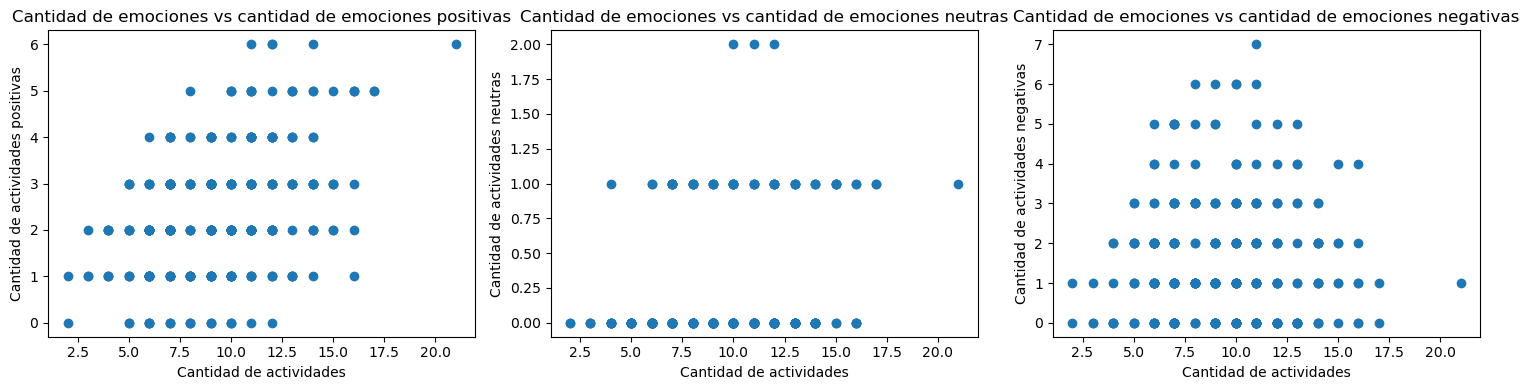

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(df['activities_count'], df['positive_emotions'])
axes[0].set_title("Cantidad de emociones vs cantidad de emociones positivas")
axes[0].set_xlabel('Cantidad de actividades')
axes[0].set_ylabel('Cantidad de actividades positivas')

axes[1].scatter(df['activities_count'], df['neutral_emotions'])
axes[1].set_title("Cantidad de emociones vs cantidad de emociones neutras")
axes[1].set_xlabel('Cantidad de actividades')
axes[1].set_ylabel('Cantidad de actividades neutras')

axes[2].scatter(df['activities_count'], df['negative_emotions'])
axes[2].set_title("Cantidad de emociones vs cantidad de emociones negativas")
axes[2].set_xlabel('Cantidad de actividades')
axes[2].set_ylabel('Cantidad de actividades negativas')

plt.tight_layout()
plt.show()

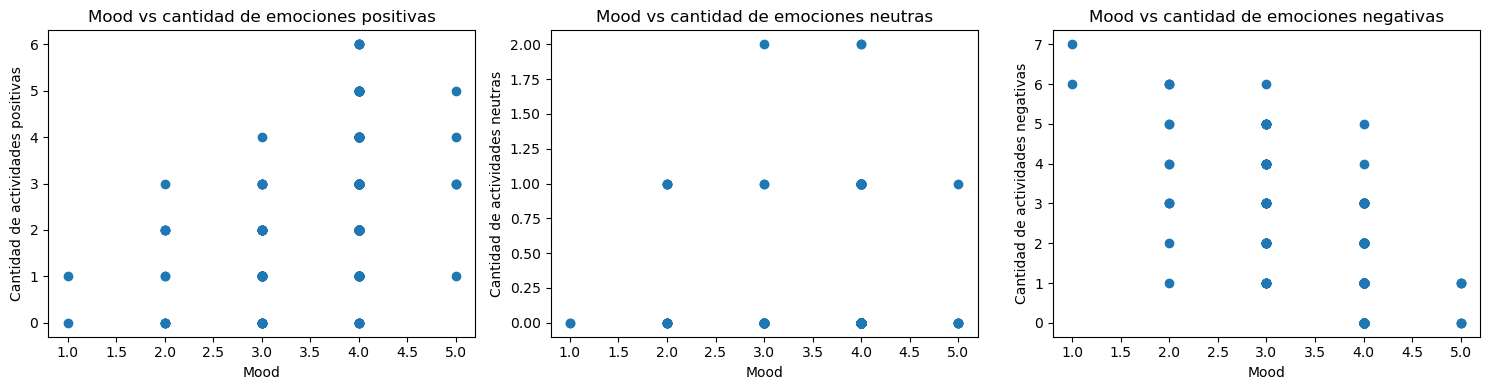

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(df['mood_numeric'], df['positive_emotions'])
axes[0].set_title("Mood vs cantidad de emociones positivas")
axes[0].set_xlabel('Mood')
axes[0].set_ylabel('Cantidad de actividades positivas')

axes[1].scatter(df['mood_numeric'], df['neutral_emotions'])
axes[1].set_title("Mood vs cantidad de emociones neutras")
axes[1].set_xlabel('Mood')
axes[1].set_ylabel('Cantidad de actividades neutras')

axes[2].scatter(df['mood_numeric'], df['negative_emotions'])
axes[2].set_title("Mood vs cantidad de emociones negativas")
axes[2].set_xlabel('Mood')
axes[2].set_ylabel('Cantidad de actividades negativas')

plt.tight_layout()
plt.show()

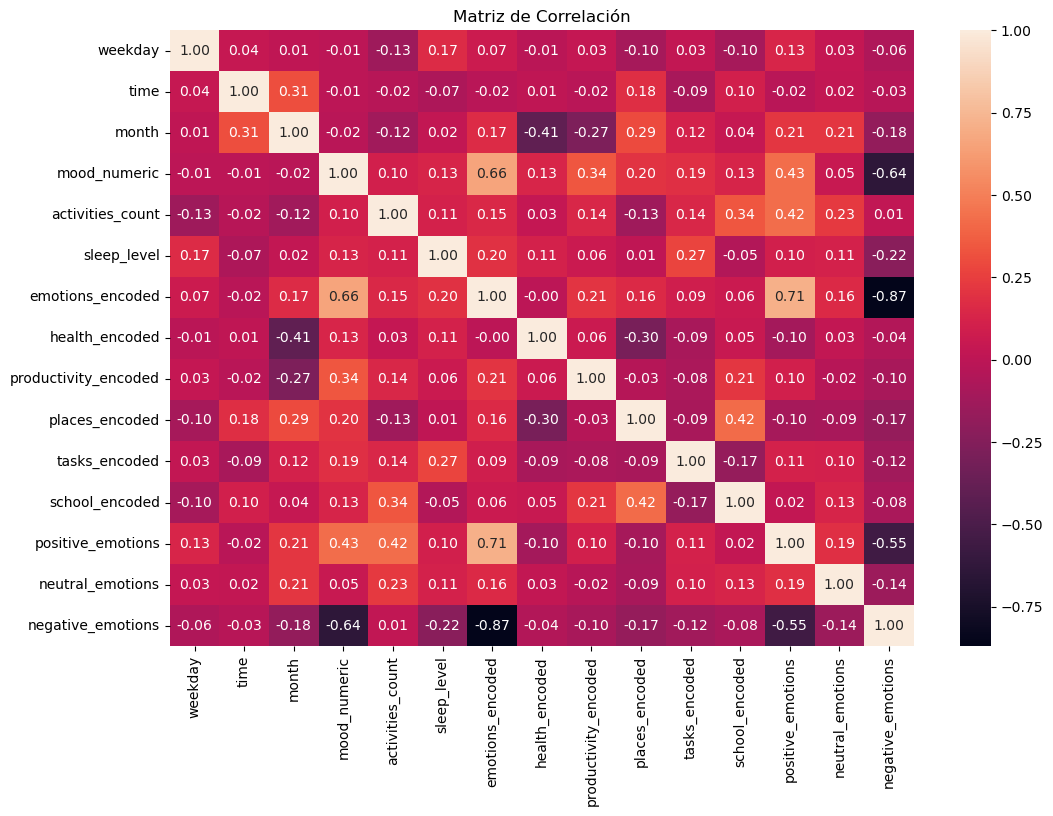

In [24]:
corr = df.drop(['full_date', 'mood', 'activities'], axis=1).corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [25]:
corr_filtered = corr[(corr > 0.6) | (corr < -0.6)]
corr_filtered = corr_filtered.where(~np.eye(corr.shape[0], dtype=bool))
corr_filtered = corr_filtered.dropna(how='all').dropna(how='all', axis=1)

corr_filtered

,mood_numeric,emotions_encoded,positive_emotions,negative_emotions
mood_numeric,NaN,0.657848,NaN,-0.639740
emotions_encoded,0.657848,NaN,0.714961,-0.870352
positive_emotions,NaN,0.714961,NaN,NaN
negative_emotions,-0.639740,-0.870352,NaN,NaN


In [16]:
from scipy.stats import chi2_contingency
from itertools import combinations

def cramers_v(df, cols):
    res = []

    for col1, col2 in combinations(cols, 2):
        table = pd.crosstab(df[col1], df[col2])
        chi2, _, _, _ = chi2_contingency(table)
        n = table.sum().sum()
        k = min(table.shape)
        v = np.sqrt(chi2 / (n * (k - 1)))
        res.append(((col1, col2), v))

    return res

In [27]:
cols = ['emotions_encoded', 'health_encoded', 'productivity_encoded', 'places_encoded', 'tasks_encoded', 'school_encoded']
cramers_v_res = cramers_v(df, cols)

print("Cramér's V con mayor relación\n")
for pair, value in cramers_v_res:
    if value > 0.70:
        print(f"{pair[0]} y {pair[1]}: {value:.2f}")

Cramér's V con mayor relación

emotions_encoded y health_encoded: 0.85
emotions_encoded y productivity_encoded: 0.79
emotions_encoded y places_encoded: 0.96
emotions_encoded y tasks_encoded: 0.87
emotions_encoded y school_encoded: 0.81
health_encoded y places_encoded: 0.86
places_encoded y school_encoded: 0.72
